In [6]:
from evolution.entities import *
from evolution.selection import *
from evolution.crossover import *
from evolution.mutation import *
from evolution.algorithm import *
from tuning.configurations_tune_2 import *

In [2]:
from google.colab import drive, files

In [3]:
import os
import sys

In [4]:
is_colab = 'google.colab' in sys.modules
if is_colab:
    base_path = "drive/folders/1SD5Nt7wWh-Y2v6O8XOWuUM3a-jwgLTyQ"
    drive.mount('/content/drive')

    os.chdir('/content/drive/MyDrive/cifo/computational-intelligence-for-optimization-project')
    print("Changed directory to:", os.getcwd())
else:
    base_path = ".."

Mounted at /content/drive
Changed directory to: /content/drive/MyDrive/cifo/computational-intelligence-for-optimization-project


In [5]:
import sys
sys.path.append(os.getcwd())

In [ ]:
print(conflicts_matrix.shape)  # deve dar (35, 35)

(35, 35)


In [ ]:
print(conflicts_matrix[0][34])

0.2


In [ ]:
ind = Individual()
print(ind)

Fitness: 0.3370
Slot 1: [13, 1, 27, 15, 29]
Slot 2: [6, 17, 21, 8, 7]
Slot 3: [22, 20, 32, 11, 26]
Slot 4: [0, 28, 12, 23, 31]
Slot 5: [16, 33, 3, 4, 24]
Slot 6: [5, 2, 30, 19, 9]
Slot 7: [10, 14, 18, 34, 25]


In [ ]:
ind.fitness()

0.3370433690717667

In [ ]:
artist_info = {
    idx: {'popularity': row['popularity'], 'genre': row['genre']}
    for idx, row in artists.iterrows()
}

In [ ]:
ind.get_conflict_penalty(conflicts_matrix)

0.48999999999999994

In [ ]:
ind.get_genre_diversity(artist_info=artist_info)

0.6857142857142857

In [ ]:
ind.get_prime_slot_popularity(artist_info=artist_info)

0.8154158215010142

In [ ]:
print(artists.index)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
      dtype='int64')


## Crossovers

### PMX Crossover

In [ ]:
parent1 = Individual()
parent2 = Individual()

print("Parent 1:")
print(parent1)
print("Fitness:", parent1.fitness())
print()

print("Parent 2:")
print(parent2)
print("Fitness:", parent2.fitness())
print()

Parent 1:
Fitness: 0.3512
Slot 1: [21, 10, 3, 14, 19]
Slot 2: [1, 23, 32, 31, 25]
Slot 3: [22, 30, 2, 8, 6]
Slot 4: [28, 20, 33, 29, 26]
Slot 5: [24, 4, 11, 16, 5]
Slot 6: [18, 12, 27, 7, 15]
Slot 7: [34, 0, 9, 13, 17]
Fitness: 0.35117647058823526

Parent 2:
Fitness: 0.3878
Slot 1: [5, 10, 32, 4, 12]
Slot 2: [31, 19, 3, 15, 6]
Slot 3: [9, 0, 18, 26, 29]
Slot 4: [2, 7, 34, 21, 20]
Slot 5: [11, 14, 24, 27, 30]
Slot 6: [8, 25, 33, 17, 28]
Slot 7: [16, 22, 1, 23, 13]
Fitness: 0.38783106345986673



In [ ]:
offspring1, offspring2 = pmx_crossover(parent1, parent2)

print("Offspring 1:")
print(offspring1)
print()

print("Offspring 2:")
print(offspring2)

Parent 1: [21, 10, 3, 14, 19, 1, 23, 32, 31, 25, 22, 30, 2, 8, 6, 28, 20, 33, 29, 26, 24, 4, 11, 16, 5, 18, 12, 27, 7, 15, 34, 0, 9, 13, 17]
Parent 2: [5, 10, 32, 4, 12, 31, 19, 3, 15, 6, 9, 0, 18, 26, 29, 2, 7, 34, 21, 20, 11, 14, 24, 27, 30, 8, 25, 33, 17, 28, 16, 22, 1, 23, 13]
Crossover points: cx1=16, cx2=32
Child1 after crossover segment: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 7, 34, 21, 20, 11, 14, 24, 27, 30, 8, 25, 33, 17, 28, 16, 22, None, None, None]
Child2 after crossover segment: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 20, 33, 29, 26, 24, 4, 11, 16, 5, 18, 12, 27, 7, 15, 34, 0, None, None, None]
Mapping1 (for child1): {7: 20, 34: 33, 21: 29, 20: 26, 11: 24, 14: 4, 24: 11, 27: 16, 30: 5, 8: 18, 25: 12, 33: 27, 17: 7, 28: 15, 16: 34, 22: 0}
Mapping2 (for child2): {20: 7, 33: 34, 29: 21, 26: 20, 24: 11, 4: 14, 11: 24, 16: 27, 5: 30, 18: 8, 12: 25, 27: 33, 7: 17, 

### Eager Breeder Crossover

In [ ]:
offspring1, offspring2 = fitness_based_slot_crossover(parent1, parent2)

print("Offspring 1:")
print(offspring1)
print()

print("Offspring 2:")
print(offspring2)


--- Top Slot Fitness Scores ---
Slot  1 | Fitness: 0.3525 | Artists: [5, 10, 32, 4, 12]
Slot  2 | Fitness: 0.2300 | Artists: [31, 19, 3, 15, 6]
Slot  3 | Fitness: 0.2300 | Artists: [34, 0, 9, 13, 17]
Slot  4 | Fitness: 0.2175 | Artists: [22, 30, 2, 8, 6]
Slot  5 | Fitness: 0.2150 | Artists: [28, 20, 33, 29, 26]
Slot  6 | Fitness: 0.2125 | Artists: [24, 4, 11, 16, 5]
Slot  7 | Fitness: 0.1600 | Artists: [1, 23, 32, 31, 25]
-----------------------------------

Total artists expected: 35
Duplicates detected: [32, 31, 4, 5, 6]
Missing artists: [7, 14, 18, 21, 27]

Replacing duplicate artist 32 in slot 0, stage 2 with missing artist 18
Replacing duplicate artist 31 in slot 0, stage 3 with missing artist 7
Replacing duplicate artist 4 in slot 1, stage 1 with missing artist 21
Replacing duplicate artist 5 in slot 1, stage 4 with missing artist 27
Replacing duplicate artist 6 in slot 3, stage 4 with missing artist 14

--- Final Offspring Representation ---
Slot 1: [1, 23, 18, 7, 25]
Slot 2: [

## Mutations

In [ ]:
n_swap_mutation(ind, mut_prob=1, n_swaps=2)

Swap 1: (2,4) [26] <--> (3,4) [31]
Swap 2: (1,2) [21] <--> (6,2) [18]


[[13, 1, 27, 15, 29],
 [6, 17, 18, 8, 7],
 [22, 20, 32, 11, 31],
 [0, 28, 12, 23, 26],
 [16, 33, 3, 4, 24],
 [5, 2, 30, 19, 9],
 [10, 14, 21, 34, 25]]

In [ ]:
scramble_mutation(ind, mut_prob=1, max_segment_length=4)

Stage: 4, Slots: 2-4, Length: 3
Before: [26, 31, 24]
After: [26, 31, 24]


[[13, 1, 27, 15, 29],
 [6, 17, 21, 8, 7],
 [22, 20, 32, 11, 26],
 [0, 28, 12, 23, 31],
 [16, 33, 3, 4, 24],
 [5, 2, 30, 19, 9],
 [10, 14, 18, 34, 25]]

In [ ]:
prime_slot_swap_mutation(ind, mut_prob=1)

Swapping row 6 (prime slot) with row 0
Before - Prime Slot: [10, 14, 18, 34, 25]
Before - Other Slot: [13, 1, 27, 15, 29]
After - Prime Slot: [13, 1, 27, 15, 29]
After - Other Slot : [10, 14, 18, 34, 25]


[[10, 14, 18, 34, 25],
 [6, 17, 21, 8, 7],
 [22, 20, 32, 11, 26],
 [0, 28, 12, 23, 31],
 [16, 33, 3, 4, 24],
 [5, 2, 30, 19, 9],
 [13, 1, 27, 15, 29]]

In [ ]:
preserve_best_slots_mutation(ind, mut_prob=1, keep_ratio=0.5)

Preserving rows: [0, 3, 4]


[[13, 1, 27, 15, 29],
 [17, 5, 10, 11, 22],
 [20, 8, 30, 25, 9],
 [0, 28, 12, 23, 31],
 [16, 33, 3, 4, 24],
 [2, 32, 21, 19, 26],
 [18, 7, 14, 34, 6]]

## Apply GA

In [ ]:
POP_SIZE = 50
initial_population = Population(
    population_size=POP_SIZE,
    crossover_function=fitness_based_slot_crossover,
    mutation_function=n_swap_mutation
)

initial_population

Individual 0:
Fitness: 0.3656
Slot 1: [26, 6, 25, 8, 0]
Slot 2: [2, 10, 24, 29, 7]
Slot 3: [14, 15, 22, 12, 32]
Slot 4: [1, 34, 27, 17, 11]
Slot 5: [21, 16, 19, 33, 28]
Slot 6: [20, 13, 9, 30, 4]
Slot 7: [31, 23, 18, 5, 3]

Individual 1:
Fitness: 0.4140
Slot 1: [34, 31, 8, 23, 2]
Slot 2: [27, 28, 13, 11, 3]
Slot 3: [30, 4, 10, 7, 19]
Slot 4: [32, 5, 17, 1, 24]
Slot 5: [25, 22, 6, 33, 15]
Slot 6: [0, 21, 9, 20, 12]
Slot 7: [18, 14, 29, 16, 26]

Individual 2:
Fitness: 0.3073
Slot 1: [20, 13, 1, 8, 22]
Slot 2: [2, 24, 0, 21, 14]
Slot 3: [18, 29, 5, 16, 17]
Slot 4: [25, 26, 31, 12, 32]
Slot 5: [6, 23, 33, 30, 27]
Slot 6: [10, 3, 28, 7, 34]
Slot 7: [15, 19, 9, 11, 4]

Individual 3:
Fitness: 0.2733
Slot 1: [30, 13, 14, 7, 24]
Slot 2: [16, 18, 5, 21, 15]
Slot 3: [29, 26, 12, 9, 2]
Slot 4: [6, 27, 8, 11, 32]
Slot 5: [10, 4, 34, 19, 1]
Slot 6: [28, 31, 25, 23, 22]
Slot 7: [3, 33, 17, 20, 0]

Individual 4:
Fitness: 0.3011
Slot 1: [19, 13, 34, 16, 20]
Slot 2: [23, 18, 14, 32, 6]
Slot 3: [30, 12, 

In [ ]:
initial_population

Individual 0:
Fitness: 0.3656
Slot 1: [26, 6, 25, 8, 0]
Slot 2: [2, 10, 24, 29, 7]
Slot 3: [14, 15, 22, 12, 32]
Slot 4: [1, 34, 27, 17, 11]
Slot 5: [21, 16, 19, 33, 28]
Slot 6: [20, 13, 9, 30, 4]
Slot 7: [31, 23, 18, 5, 3]

Individual 1:
Fitness: 0.4140
Slot 1: [34, 31, 8, 23, 2]
Slot 2: [27, 28, 13, 11, 3]
Slot 3: [30, 4, 10, 7, 19]
Slot 4: [32, 5, 17, 1, 24]
Slot 5: [25, 22, 6, 33, 15]
Slot 6: [0, 21, 9, 20, 12]
Slot 7: [18, 14, 29, 16, 26]

Individual 2:
Fitness: 0.3073
Slot 1: [20, 13, 1, 8, 22]
Slot 2: [2, 24, 0, 21, 14]
Slot 3: [18, 29, 5, 16, 17]
Slot 4: [25, 26, 31, 12, 32]
Slot 5: [6, 23, 33, 30, 27]
Slot 6: [10, 3, 28, 7, 34]
Slot 7: [15, 19, 9, 11, 4]

Individual 3:
Fitness: 0.2733
Slot 1: [30, 13, 14, 7, 24]
Slot 2: [16, 18, 5, 21, 15]
Slot 3: [29, 26, 12, 9, 2]
Slot 4: [6, 27, 8, 11, 32]
Slot 5: [10, 4, 34, 19, 1]
Slot 6: [28, 31, 25, 23, 22]
Slot 7: [3, 33, 17, 20, 0]

Individual 4:
Fitness: 0.3011
Slot 1: [19, 13, 34, 16, 20]
Slot 2: [23, 18, 14, 32, 6]
Slot 3: [30, 12, 

In [ ]:
history, best_solution = genetic_algorithm(
    initial_population=initial_population,
    max_gen=3,
    selection_algorithm=fitness_proportionate_selection,
    maximization=True,
    xo_prob=0.4,
    mut_prob=0.7,
    elitism=True,
    verbose=True
)

print(f"Best solution fitness: {best_solution.fitness():.4f}")

-------------- Generation: 1 --------------

Selected individuals:
Fitness: 0.3898
Slot 1: [22, 29, 8, 33, 3]
Slot 2: [5, 16, 2, 17, 18]
Slot 3: [24, 20, 19, 23, 4]
Slot 4: [11, 34, 9, 7, 32]
Slot 5: [0, 28, 31, 12, 15]
Slot 6: [6, 10, 13, 30, 25]
Slot 7: [26, 27, 21, 1, 14]
Fitness: 0.3120
Slot 1: [13, 34, 31, 14, 26]
Slot 2: [33, 15, 11, 32, 0]
Slot 3: [7, 17, 18, 8, 3]
Slot 4: [21, 2, 19, 25, 22]
Slot 5: [5, 9, 24, 29, 27]
Slot 6: [12, 28, 20, 10, 1]
Slot 7: [23, 30, 16, 6, 4]


--- Top Slot Fitness Scores ---
Slot  1 | Fitness: 0.2250 | Artists: [22, 29, 8, 33, 3]
Slot  2 | Fitness: 0.2075 | Artists: [5, 9, 24, 29, 27]
Slot  3 | Fitness: 0.2025 | Artists: [5, 16, 2, 17, 18]
Slot  4 | Fitness: 0.1750 | Artists: [11, 34, 9, 7, 32]
Slot  5 | Fitness: 0.1650 | Artists: [23, 30, 16, 6, 4]
Slot  6 | Fitness: 0.1625 | Artists: [24, 20, 19, 23, 4]
Slot  7 | Fitness: 0.1325 | Artists: [12, 28, 20, 10, 1]
-----------------------------------

Total artists expected: 35
Duplicates detected: [2

In [ ]:
history

[0.41404134067420073, 0.41404134067420073, 0.41894523326572014]

## Grid Search

In [ ]:
from evolution.entities import Population
from evolution.selection import (fitness_proportionate_selection, ranking_selection,tournament_selection )
from evolution.crossover import ( pmx_crossover, fitness_based_slot_crossover )
from evolution.mutation import (n_swap_mutation,scramble_mutation,prime_slot_swap_mutation,preserve_best_slots_mutation)
from evolution.algorithm import genetic_algorithm
import pandas as pd
from itertools import product
from random import sample
from evolution.algorithm import genetic_algorithm
import numpy as np

crossover_operators = [pmx_crossover, fitness_based_slot_crossover]
mutation_operators = [n_swap_mutation, scramble_mutation, prime_slot_swap_mutation, preserve_best_slots_mutation]
selection_methods = [fitness_proportionate_selection, ranking_selection,tournament_selection]

# All combinations of crossover and mutation operators
configurations= list(product(crossover_operators, mutation_operators, selection_methods))


In [ ]:
from evolution.entities import Population
from evolution.selection import (fitness_proportionate_selection, ranking_selection,tournament_selection )
from evolution.crossover import ( pmx_crossover, fitness_based_slot_crossover )
from evolution.mutation import (n_swap_mutation,scramble_mutation,prime_slot_swap_mutation,preserve_best_slots_mutation)
from evolution.algorithm import genetic_algorithm
import pandas as pd
from itertools import product
from random import sample
from evolution.algorithm import genetic_algorithm
import numpy as np

crossover = [pmx_crossover, fitness_based_slot_crossover]
mutation_operators = [n_swap_mutation, scramble_mutation, prime_slot_swap_mutation, preserve_best_slots_mutation]
selection_methods = [fitness_proportionate_selection, ranking_selection,tournament_selection]

# All combinations of crossover and mutation operators
configurations= list(product(crossover_operators, mutation_operators, selection_methods))

# Fixed Parameters
# Genetic operators and elitism
xo_prob = 0.9
mut_prob = 0.1

# GA evolution
n_runs = 30 #statistical significant value
n_generations = 100
pop_size = 50

for (crossover, mutation, selection) in configurations:
    configuration_name = f'Selection: {selection.__name__}| Crossover: {crossover.__name__} | Mutation: {mutation.__name__}'
    print(configuration_name)


Selection: fitness_proportionate_selection| Crossover: pmx_crossover | Mutation: n_swap_mutation
Selection: ranking_selection| Crossover: pmx_crossover | Mutation: n_swap_mutation
Selection: tournament_selection| Crossover: pmx_crossover | Mutation: n_swap_mutation
Selection: fitness_proportionate_selection| Crossover: pmx_crossover | Mutation: scramble_mutation
Selection: ranking_selection| Crossover: pmx_crossover | Mutation: scramble_mutation
Selection: tournament_selection| Crossover: pmx_crossover | Mutation: scramble_mutation
Selection: fitness_proportionate_selection| Crossover: pmx_crossover | Mutation: prime_slot_swap_mutation
Selection: ranking_selection| Crossover: pmx_crossover | Mutation: prime_slot_swap_mutation
Selection: tournament_selection| Crossover: pmx_crossover | Mutation: prime_slot_swap_mutation
Selection: fitness_proportionate_selection| Crossover: pmx_crossover | Mutation: preserve_best_slots_mutation
Selection: ranking_selection| Crossover: pmx_crossover | Mu

In [10]:
results = grid_search(configurations=configurations, mode='detailed', n_runs=30, verbose_ga=True)

A saída de streaming foi truncada nas últimas 5000 linhas.
Slot 1: [0, 32, 3, 23, 16]
Slot 2: [8, 11, 28, 27, 34]
Slot 3: [21, 25, 12, 18, 29]
Slot 4: [4, 30, 5, 9, 31]
Slot 5: [26, 24, 22, 19, 7]
Slot 6: [20, 15, 2, 33, 13]
Slot 7: [1, 14, 17, 10, 6]
Second mutated individual:
Fitness: 1.0982
Slot 1: [1, 0, 30, 24, 6]
Slot 2: [11, 2, 9, 23, 17]
Slot 3: [16, 33, 27, 8, 18]
Slot 4: [3, 4, 15, 34, 26]
Slot 5: [29, 28, 32, 5, 10]
Slot 6: [7, 19, 21, 31, 14]
Slot 7: [12, 20, 13, 25, 22]

Selected individuals:
Fitness: 1.3525
Slot 1: [8, 11, 28, 27, 34]
Slot 2: [23, 9, 5, 13, 31]
Slot 3: [21, 25, 12, 18, 29]
Slot 4: [3, 33, 16, 2, 32]
Slot 5: [26, 24, 22, 19, 7]
Slot 6: [0, 30, 15, 4, 20]
Slot 7: [1, 14, 17, 10, 6]
Fitness: 1.2911
Slot 1: [16, 31, 4, 20, 2]
Slot 2: [8, 11, 28, 27, 34]
Slot 3: [21, 25, 12, 18, 29]
Slot 4: [3, 33, 15, 30, 9]
Slot 5: [26, 24, 22, 19, 7]
Slot 6: [5, 32, 23, 0, 13]
Slot 7: [1, 14, 17, 10, 6]

Applied replication - offspring:
Fitness: 1.3525
Slot 1: [8, 11, 28, 2

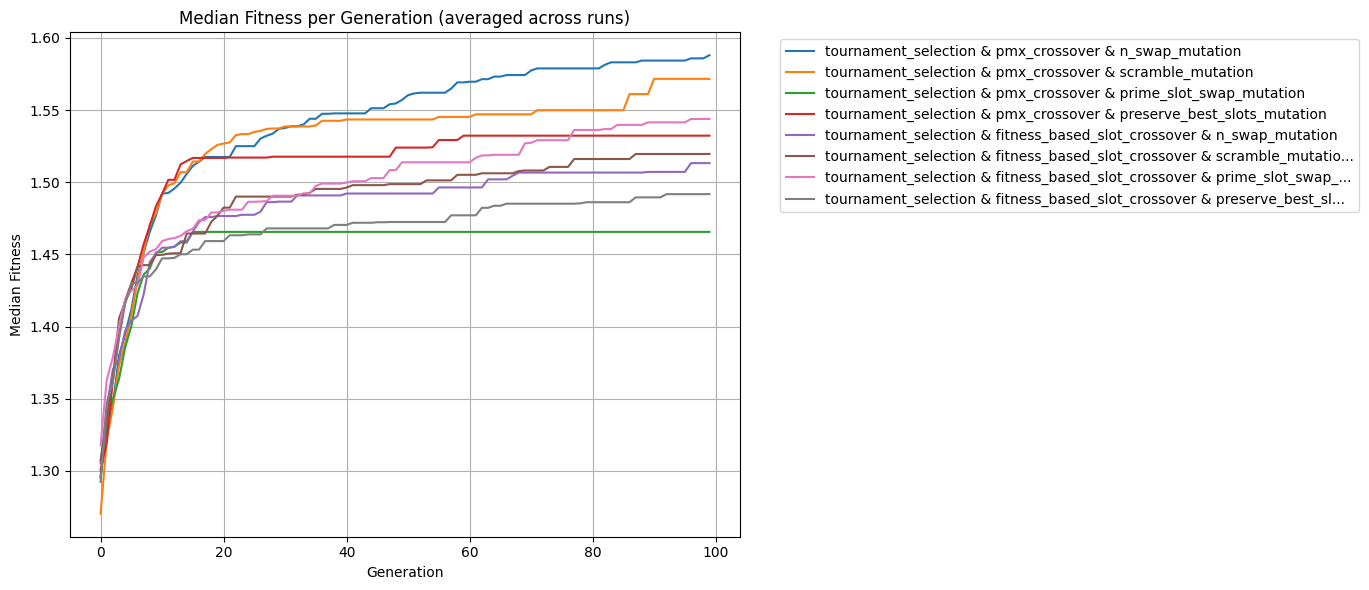

In [11]:
import matplotlib.pyplot as plt

results_cleaned = deepcopy(results)

for col in results.columns:
    results_cleaned[col] = results[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

median_per_combination = {}

for col in results_cleaned.columns:
    matrix = np.array(results_cleaned[col].to_list())
    # Compute the median across runs for each generation (row by row)
    median_per_combination[col] = np.median(matrix, axis=0)

# Convert the dictionary to a new DataFrame (columns = configurations, rows = generations)
median_df = pd.DataFrame(median_per_combination)


plt.figure(figsize=(14, 6))
for col in median_df.columns:
    plt.plot(median_df.index, median_df[col], label=col[:70] + "..." if len(col) > 70 else col)

plt.xlabel("Generation")
plt.ylabel("Median Fitness")
plt.title("Median Fitness per Generation (averaged across runs)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [12]:
results.to_csv("results_detailed_tournament.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

In [ ]:
results = grid_search(configurations=configurations, mode='detailed', n_runs=30, verbose_ga=True)

A saída de streaming foi truncada nas últimas 5000 linhas.
Slot 2: [24, 14, 33, 9, 34]
Slot 3: [16, 4, 10, 1, 11]
Slot 4: [26, 8, 2, 23, 17]
Slot 5: [30, 15, 6, 0, 22]
Slot 6: [25, 3, 29, 13, 21]
Slot 7: [5, 28, 27, 20, 12]
Second mutated individual:
Fitness: 0.9719
Slot 1: [19, 8, 30, 5, 32]
Slot 2: [18, 1, 4, 31, 33]
Slot 3: [11, 21, 12, 28, 23]
Slot 4: [29, 9, 24, 27, 6]
Slot 5: [34, 26, 10, 3, 0]
Slot 6: [22, 25, 20, 7, 13]
Slot 7: [14, 17, 16, 2, 15]

Selected individuals:
Fitness: 1.0234
Slot 1: [10, 7, 28, 13, 34]
Slot 2: [20, 5, 15, 24, 30]
Slot 3: [26, 21, 9, 2, 27]
Slot 4: [14, 0, 17, 31, 8]
Slot 5: [19, 12, 3, 6, 32]
Slot 6: [33, 16, 29, 22, 23]
Slot 7: [11, 4, 18, 25, 1]
Fitness: 1.2339
Slot 1: [12, 13, 20, 21, 18]
Slot 2: [2, 6, 25, 34, 30]
Slot 3: [17, 27, 11, 15, 3]
Slot 4: [7, 0, 29, 22, 31]
Slot 5: [28, 24, 33, 4, 1]
Slot 6: [9, 8, 23, 19, 26]
Slot 7: [32, 16, 5, 14, 10]

Applied crossover - offspring:
Fitness: 1.2012
Slot 1: [2, 6, 20, 34, 30]
Slot 2: [3, 13, 15, 27, 

In [ ]:
import matplotlib.pyplot as plt

results_cleaned = deepcopy(results)

for col in results.columns:
    results_cleaned[col] = results[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

median_per_combination = {}

for col in results_cleaned.columns:
    matrix = np.array(results_cleaned[col].to_list())
    # Compute the median across runs for each generation (row by row)
    median_per_combination[col] = np.median(matrix, axis=0)

# Convert the dictionary to a new DataFrame (columns = configurations, rows = generations)
median_df = pd.DataFrame(median_per_combination)


plt.figure(figsize=(14, 6))
for col in median_df.columns:
    plt.plot(median_df.index, median_df[col], label=col[:70] + "..." if len(col) > 70 else col)

plt.xlabel("Generation")
plt.ylabel("Median Fitness")
plt.title("Median Fitness per Generation (averaged across runs)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
results.to_csv("results_detailed_ranking.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

In [ ]:
import matplotlib.pyplot as plt

results_cleaned = deepcopy(results)

for col in results.columns:
    results_cleaned[col] = results[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

median_per_combination = {}

for col in results_cleaned.columns:
    matrix = np.array(results_cleaned[col].to_list())
    # Compute the median across runs for each generation (row by row)
    median_per_combination[col] = np.median(matrix, axis=0)

# Convert the dictionary to a new DataFrame (columns = configurations, rows = generations)
median_df = pd.DataFrame(median_per_combination)


plt.figure(figsize=(14, 6))
for col in median_df.columns:
    plt.plot(median_df.index, median_df[col], label=col[:70] + "..." if len(col) > 70 else col)

plt.xlabel("Generation")
plt.ylabel("Median Fitness")
plt.title("Median Fitness per Generation (averaged across runs)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
results.to_csv("results_detailed_ranking_2.csv", index=False, quoting=csv.QUOTE_NONNUMERIC)